## 2.1 Method 1 - Simple

In [1]:
import spacy

In [17]:
#First we have to import the spaCy library and download the language models
import spacy

nlp = spacy.load("en_core_web_sm")
method_1 = nlp('git clone https://github.com/X-PLUG/MobileAgent.git \
cd MobileAgent \
pip install -r requirements.txt')

method_2 = nlp('## Setup \
The following steps provide the necessary setup to run our codes. \
1. Create a Python virtual environment with Conda: \
``` \
conda create -n myenv python=3.10 \
conda activate myenv \
``` \
2. Install PyTorch `v2.1.0` with compatible cuda version, following instructions from [PyTorch Installation Page](https://pytorch.org/get-started/locally/). For example with cuda 11: \
``` \
pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu118 \
``` \
3. Install the following Python dependencies to run the codes. \
``` \
python -m pip install . \
python -m pip install flash-attn --no-build-isolation \
``` \
4. Login to your huggingface account for downloading models \
``` \
huggingface-cli login --token "${your_access_token}" \
```')

# Let's view the tokens
for token in method_1:
  print(token.text)

git
clone
https://github.com/X-PLUG/MobileAgent.git
cd
MobileAgent
pip
install
-r
requirements.txt


In [8]:
# doc.sents - an iterator over the sentences in the Doc object
for id, sent in enumerate(method_1.sents):
  print(f'Sentence {id+1}: {sent}')

Sentence 1: git clone https://github.com/X-PLUG/MobileAgent.git cd MobileAgent pip install -r requirements.txt


In [9]:
# inspect token.lemma_, pos_, tag_, _dep

token_details = []
for idx, token in enumerate(method_1):
  token_details.append((idx, token.text, token.lemma_, token.pos_, token.tag_, token.dep_))

In [10]:
from tabulate import tabulate

print(tabulate(token_details[:25], headers=['ID', 'TEXT', 'LEMMA', 'POS', 'TAG', 'DEP']))

  ID  TEXT                                       LEMMA                                      POS    TAG    DEP
----  -----------------------------------------  -----------------------------------------  -----  -----  --------
   0  git                                        git                                        PROPN  NNP    compound
   1  clone                                      clone                                      PROPN  NNP    compound
   2  https://github.com/X-PLUG/MobileAgent.git  https://github.com/X-PLUG/MobileAgent.git  PROPN  NNP    compound
   3  cd                                         cd                                         PROPN  NNP    compound
   4  MobileAgent                                MobileAgent                                PROPN  NNP    nsubj
   5  pip                                        pip                                        PROPN  NNP    compound
   6  install                                    install                                

In [11]:
from spacy import displacy

for sent in method_1.sents:
  displacy.render(sent, style="dep", jupyter=True, options={'distance': 100})

In [12]:
ner_details = []

for ent in method_1.ents:
  ner_details.append((ent.text, ent.start_char, ent.end_char, ent.label_))

In [13]:
import pandas as pd

# for now, just for printing tabular data nicely ;)
pd.DataFrame(ner_details, columns=['TEXT', 'START', 'END', 'LABEL'])

/Users/ccugutrillague/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,TEXT,START,END,LABEL
0,git clone https://github.com/X-PLUG/MobileAgen...,0,54,ORG


In [14]:
from spacy import displacy

# Let's use displacy to display the entities.
displacy.render(method_1, style='ent', jupyter=True)

In [16]:
#First we have to import the spacy library and download the language models
import spacy
import pandas as pd
from spacy import displacy

nlp = spacy.load("en_core_web_sm")


displacy.render(method_1, style='ent', jupyter=True)

for sent in method_1.sents:
  displacy.render(sent, style="dep", jupyter=True, options={'distance': 100})

In [18]:
!pip3 install rdflib pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=95d92dace00bffd006c4d169dab8d3d2be3ba658ad9c28847d4246134b50a682
  Stored in directory: /Users/ccugutrillague/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [19]:
#import rdflib
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import DC, RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces
#for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [20]:
# helper function for visualizing RDF graphs
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

In [57]:
from rdflib import Graph
g = Graph()
turtledata = """
@prefix p-plan: <http://purl.org/net/p-plan#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix bpmn: <http://www.w3.org/ns/bpmn#> .

# Define the Plan _:P1
_:P1 a p-plan:Plan ;
    rdfs:label "Method 1: With pip" ;
    p-plan:isStepOfPlan _:Step1P1 .

# Define the Step _:Step1P1
_:Step1P1 a p-plan:Step, bpmn:ScriptTask ;
    rdfs:label "pip3 install 'fschat[model_worker,webui]'" ;
    p-plan:isStepOfPlan _:P1 .

# Define the Plan _:P2
_:P2 a p-plan:Plan ;
    rdfs:label "Method 2: From source" ;
    p-plan:isStepOfPlan _:Step1P2, _:Step2P2, _:Step2P3, _:Step2P4 .

# Define the Step _:Step1P2
_:Step1P2 a p-plan:Step, bpmn:ManualTask ;
    rdfs:label "git clone https://github.com/lm-sys/FastChat.git" ;
    rdfs:comment "1. Clone this repository and" ;
    p-plan:isStepOfPlan _:P2 .

_:Step2P2 a p-plan:Step, bpmn:ScriptTask ;
    rdfs:label "cd FastChat" ;
    rdfs:comment "navigate to the FastChat folder" ;
    p-plan:isStepOfPlan _:P2 .

_:Step2P3 a p-plan:Step, bpmn:ScriptTask ;
    rdfs:label "brew install rust cmake" ;
    rdfs:comment "If you are running on Mac" ;
    p-plan:isStepOfPlan _:P2 .

_:Step2P4 a p-plan:Step, bpmn:ScriptTask ;
    rdfs:label "pip3 install --upgrade pip # enable PEP 660 support pip3 install -e .[model_worker,webui]" ;
    rdfs:comment "2. Install Package" ;
    p-plan:isStepOfPlan _:P2 .
"""
g.parse(data=turtledata, format="turtle")

<Graph identifier=N0840fb1c4ef64ccf9513e86974bb64cb (<class 'rdflib.graph.Graph'>)>

In [ ]:
# step2P4 = URIRef('http://purl.org/net/p-plan#_:Step2P4')
# # Print all information about _:Step2P4
# for s, p, o in g.triples((step2P4, None, None)):
#     print(f"Subject: {s}, Predicate: {p}, Object: {o}")

In [62]:
!pip install transformers


In [68]:
!ls

corpus_generator.ipynb     extractINSTALL.py
data                       mapper.py
explore_instructions.ipynb


In [50]:
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [54]:
# load annotated dataset
from json import load


with open('data/installation_methods.json') as f:
    data = json.load(f)
    print(data)

[{'url': 'http://x', 'text': 'Sudo apt update', 'label': 'Command', 'method': 'source', 'step_number': 1}, {'url': 'http://x', 'text': 'Install required dependencies:', 'label': 'Instruction', 'method': 'source', 'step_number': 1}, {'url': 'http://x', 'text': 'sudo apt install -y build-essential cmake libboost-program-options-dev libncurses5-dev libtclap-dev zlib1g-dev libxml2-dev libsqlite3-dev libreadline6-dev libssl-dev libffi-dev wget unzip', 'label': 'Dependency List', 'method': 'container', 'step_number': 7}]


In [55]:
# functions for preprocessing
def clean_text(text):
    # Perform necessary text cleaning here
    return text
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def tokenize_function(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [46]:
# create dataset
import torch
import torch.utils.data
import numpy as np
# texts = [clean_text(x["text"]) for x in data]
# print(texts)
# labels = [x["label"] for x in data]
# print(labels)
# train_dataset = torch.utils.data.TensorDataset(torch.tensor(texts), torch.tensor([labels]))
# solution
label_map = {
    "prerequisite": 0,
    "Dependency List": 1,
    "Instruction": 2,
    "Command": 3,
    # Add any other possible labels here
}
# texts = torch.tensor([torch.tensor(x["text"].encode()) for x in data], dtype=torch.uint8)
# labels = torch.LongTensor(np.array([label_map[x["label"]] for x in data], dtype=np.int64))

# train_dataset = torch.utils.data.TensorDataset(texts, labels)

texts = []
for example in data:
    texts.append(example['text'])
texts = tokenizer(texts, padding=True, truncation=True)['input_ids']

labels = torch.LongTensor(np.array([label_map[x["label"]] for x in data], dtype=np.int64))

train_dataset = torch.utils.data.TensorDataset(torch.tensor(texts), labels)




In [48]:
labels

tensor([3, 2, 1])

In [47]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
print(train_dataset, val_dataset)

<torch.utils.data.dataset.Subset object at 0x28a21aa10> <torch.utils.data.dataset.Subset object at 0x28e318dd0>


In [7]:
# model architecture
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=len(set(data[-1]['label'])))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [55]:
%pip install accelerate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [44]:
# # Ensure the required version of accelerate is installed
# %pip install transformers[torch]==4.11.3

# # Training loop
# from transformers import AdamW, Trainer, TrainingArguments
# from sklearn.metrics import accuracy_score
# epochs = 3
# learning_rate = 5e-5
# optimizer = AdamW(model.parameters(), lr=learning_rate)

# training_args = TrainingArguments(
#     output_dir="./results",
#     num_train_epochs=epochs,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=64,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir="./logs",
#     logging_steps=10,
#     evaluation_strategy="epoch",
#     save_steps=100,
#     disable_tqdm=True  # Added to address the TypeError issue
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=lambda pred: {'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1))},
# )

# trainer.train()


## Fine-tuning LLMs
https://towardsdatascience.com/fine-tuning-large-language-models-llms-23473d763b91

In [56]:
# fine tuning
%pip install evaluate
from datasets import load_dataset, DatasetDict, Dataset

from transformers import (
    AutoTokenizer,
    AutoConfig, 
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer)

from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import evaluate
import torch
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [58]:
# base model
model_checkpoint = 'distilbert-base-uncased'

# define label maps
id2label = {0: "Source", 1: "Container"}
label2id = {"Source":0, "`Container`":1}


# generate classification model from model_checkpoint
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
id2label

{0: 'Source', 1: 'Container'}

In [57]:
# load dataset
dataset = load_dataset("carlosug/ReadmeInstallationPlan")
dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['step_number', 'method', 'text', 'url', 'label'],
        num_rows: 3
    })
})

In [60]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

,step_number,method,text,url,label
0,1,source,Sudo apt update,http://x,Command
1,1,source,Install required dependencies:,http://x,Instruction
2,7,container,sudo apt install -y build-essential cmake libb...,http://x,Dependency List


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

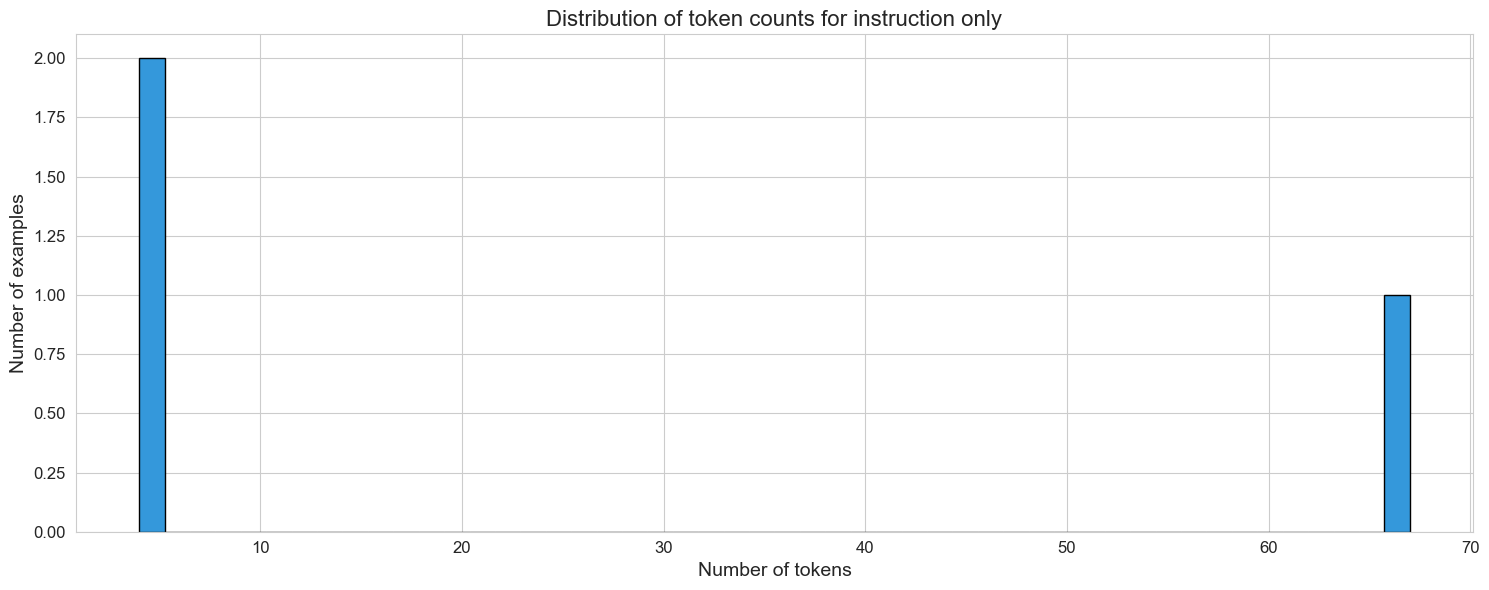

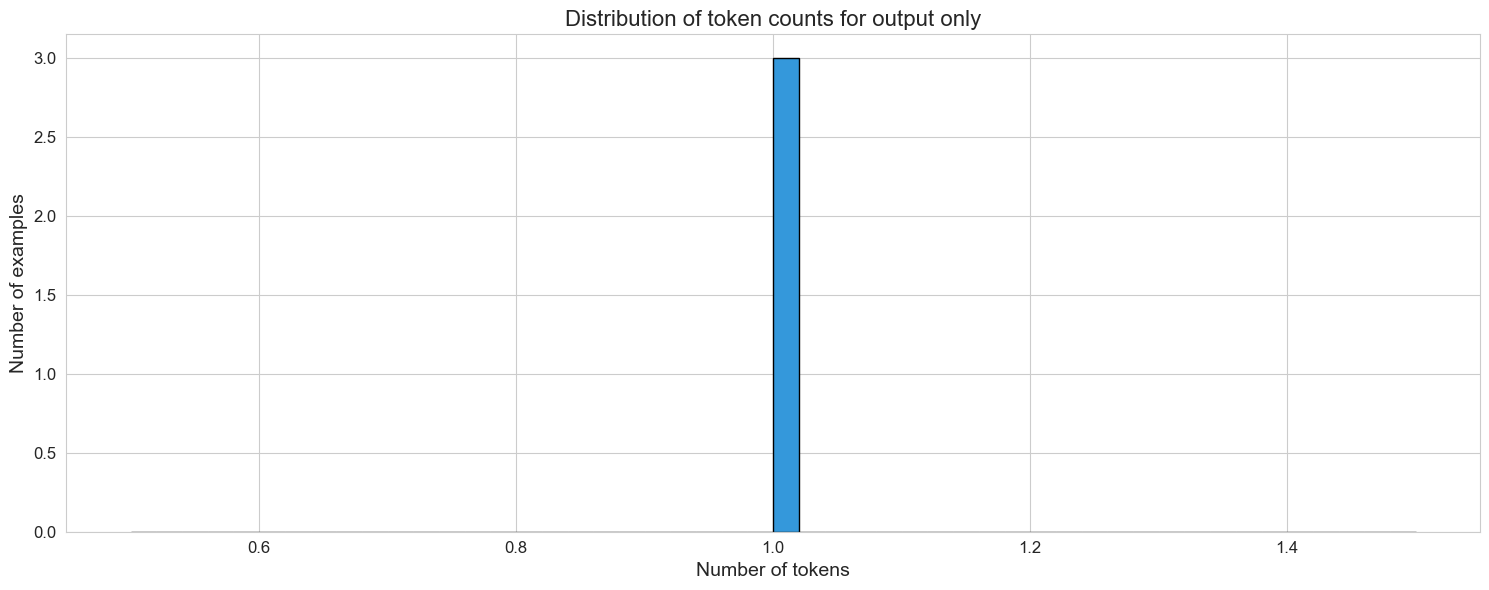

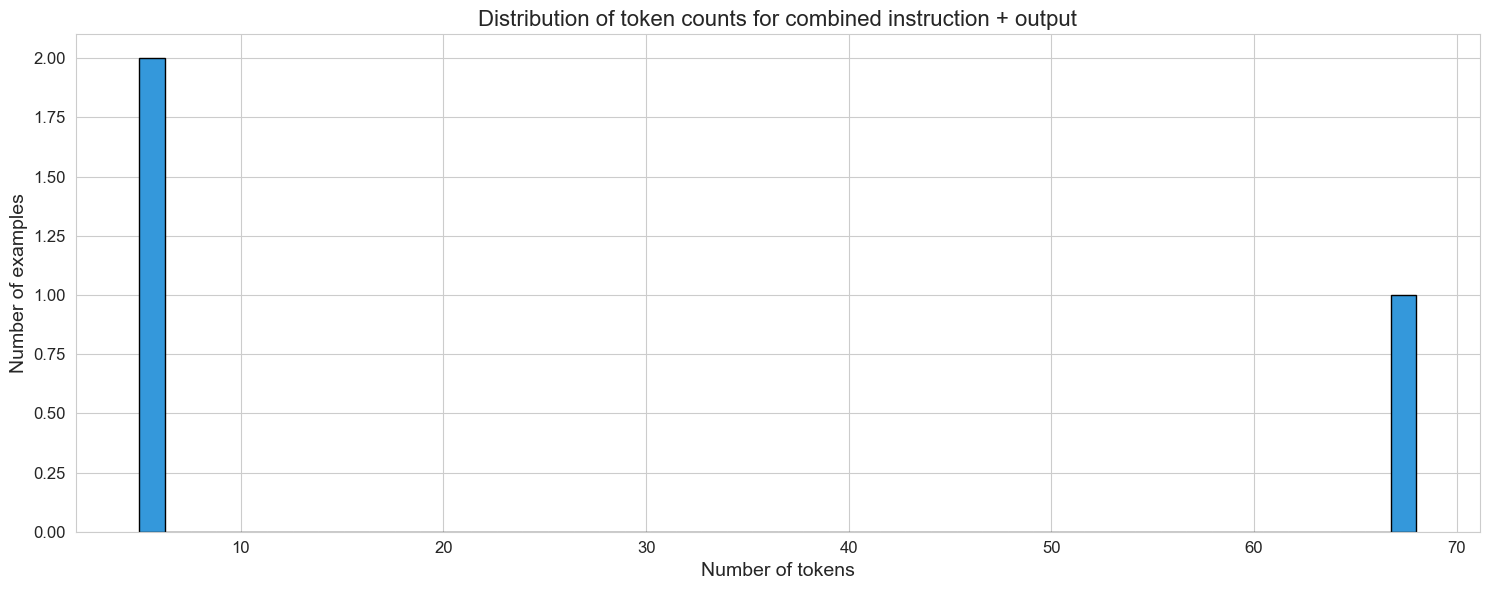

In [61]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

# 2. Tokenize each row and count the number of tokens
instruction_token_counts = [len(tokenizer.tokenize(example["text"])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["method"])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Helper function to plot the distributions
def plot_distribution(token_counts, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 6))
    plt.hist(token_counts, bins=50, color='#3498db', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Number of tokens", fontsize=14)
    plt.ylabel("Number of examples", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

In [20]:
# preproces data
# create tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

In [21]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["text"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

# add pad token if none exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# tokenize training and validation datasets
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [22]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [23]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, 
                                          references=labels)}

In [24]:
# define list of examples
text_list = ["It was good.", "Not a fan, don't recommed.", 
"Better than the first one.", "This is not worth watching even once.", 
"This one is a pass."]

print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    # tokenize text
    inputs = tokenizer.encode(text, return_tensors="pt")
    # compute logits
    logits = model(inputs).logits
    # convert logits to label
    predictions = torch.argmax(logits)

    print(text + " - " + id2label[predictions.tolist()])

Untrained model predictions:
----------------------------
It was good. - Negative
Not a fan, don't recommed. - Negative
Better than the first one. - Negative
This is not worth watching even once. - Negative
This one is a pass. - Negative


In [25]:
# fine tuning with lora
peft_config = LoraConfig(task_type="SEQ_CLS", # sequence classification
                        r=4, # intrinsic rank of trainable weight matrix
                        lora_alpha=32, # this is like a learning rate
                        lora_dropout=0.01, # probablity of dropout
                        target_modules = ['q_lin']) # we apply lora to query layer only

In [26]:
# train model
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9306847223789819


In [27]:
# define hyperparameters for model training
# hyperparameters
lr = 1e-3 # size of optimization step 
batch_size = 4 # number of examples processed per optimziation step
num_epochs = 10 # number of times model runs through training data

# define training arguments
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",
    learning_rate=lr,
    per_device_train_batch_size=batch_size, 
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [28]:
# creater trainer object
trainer = Trainer(
    model=model, # our peft model
    args=training_args, # hyperparameters
    train_dataset=tokenized_dataset["train"], # training data
    eval_dataset=tokenized_dataset["validation"], # validation data
    tokenizer=tokenizer, # define tokenizer
    data_collator=data_collator, # this will dynamically pad examples in each batch to be equal length
    compute_metrics=compute_metrics, # evaluates model using compute_metrics() function from before
)

# train model
trainer.train()

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.37771275639533997, 'eval_accuracy': {'accuracy': 0.873}, 'eval_runtime': 65.4886, 'eval_samples_per_second': 15.27, 'eval_steps_per_second': 3.817, 'epoch': 1.0}
{'loss': 0.438, 'learning_rate': 0.0008, 'epoch': 2.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.46325165033340454, 'eval_accuracy': {'accuracy': 0.886}, 'eval_runtime': 39.3291, 'eval_samples_per_second': 25.426, 'eval_steps_per_second': 6.357, 'epoch': 2.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.4990239441394806, 'eval_accuracy': {'accuracy': 0.885}, 'eval_runtime': 38.7502, 'eval_samples_per_second': 25.806, 'eval_steps_per_second': 6.452, 'epoch': 3.0}
{'loss': 0.2213, 'learning_rate': 0.0006, 'epoch': 4.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.6200022101402283, 'eval_accuracy': {'accuracy': 0.893}, 'eval_runtime': 47.5836, 'eval_samples_per_second': 21.016, 'eval_steps_per_second': 5.254, 'epoch': 4.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.6456619501113892, 'eval_accuracy': {'accuracy': 0.896}, 'eval_runtime': 48.8466, 'eval_samples_per_second': 20.472, 'eval_steps_per_second': 5.118, 'epoch': 5.0}
{'loss': 0.1086, 'learning_rate': 0.0004, 'epoch': 6.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.8703626990318298, 'eval_accuracy': {'accuracy': 0.882}, 'eval_runtime': 46.1286, 'eval_samples_per_second': 21.679, 'eval_steps_per_second': 5.42, 'epoch': 6.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 0.9367573857307434, 'eval_accuracy': {'accuracy': 0.89}, 'eval_runtime': 46.0489, 'eval_samples_per_second': 21.716, 'eval_steps_per_second': 5.429, 'epoch': 7.0}
{'loss': 0.0104, 'learning_rate': 0.0002, 'epoch': 8.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 1.0128458738327026, 'eval_accuracy': {'accuracy': 0.888}, 'eval_runtime': 52.2078, 'eval_samples_per_second': 19.154, 'eval_steps_per_second': 4.789, 'epoch': 8.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 1.037246823310852, 'eval_accuracy': {'accuracy': 0.891}, 'eval_runtime': 46.4281, 'eval_samples_per_second': 21.539, 'eval_steps_per_second': 5.385, 'epoch': 9.0}
{'loss': 0.0129, 'learning_rate': 0.0, 'epoch': 10.0}


  0%|          | 0/250 [00:00<?, ?it/s]

{'eval_loss': 1.0342522859573364, 'eval_accuracy': {'accuracy': 0.89}, 'eval_runtime': 45.4583, 'eval_samples_per_second': 21.998, 'eval_steps_per_second': 5.5, 'epoch': 10.0}
{'train_runtime': 1642.1882, 'train_samples_per_second': 6.089, 'train_steps_per_second': 1.522, 'train_loss': 0.15821605739593506, 'epoch': 10.0}


TrainOutput(global_step=2500, training_loss=0.15821605739593506, metrics={'train_runtime': 1642.1882, 'train_samples_per_second': 6.089, 'train_steps_per_second': 1.522, 'train_loss': 0.15821605739593506, 'epoch': 10.0})

In [29]:
%ls

corpus_generator.ipynb
data/
distilbert-base-uncased-lora-text-classification/
explore_instructions.ipynb
extractINSTALL.py
mapper.py
results/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [30]:
trainer.save_model("results/ft-model")

In [31]:
from transformers import pipeline
from transformers import AutoModelForTokenClassification
from transformers import AutoTokenizer
from transformers import TokenClassificationPipeline
import torch


In [38]:
EXAMPLE = "where are you?"

In [39]:
tokenizer = AutoTokenizer.from_pretrained("karlholten/distilbert-carpentries-restaurant-ner")

In [40]:
model = AutoModelForTokenClassification.from_pretrained("karlholten/distilbert-carpentries-restaurant-ner")

In [35]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first")

In [42]:
ner_results = nlp(EXAMPLE)

In [43]:
print(ner_results)

[]
